In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import  mean_squared_error, r2_score
from collections import Counter

import statsmodels.api as sm

In [3]:
# cal = pd.read_csv('calendar.csv.gz')
# listd = pd.read_csv('listings.csv.gz')
# lists = pd.read_csv('listings.csv')
# revs = pd.read_csv('reviews.csv.gz')
# nhood = pd.read_csv('neighbourhoods.csv')
purelst = pd.read_csv('listings.csv.gz')

In [4]:
# pd.set_option('display.max_colu?mns', 96)
pd.set_option('display.max_rows', 96)

In [5]:
import pickle
X_train= pd.read_pickle('pkls/price_split/X_lt_train.pkl')
y_train= pd.read_pickle('pkls/price_split/y_lt_train.pkl')
X_test= pd.read_pickle('pkls/price_split/X_lt_test.pkl')
y_test= pd.read_pickle('pkls/price_split/y_lt_test.pkl')

In [6]:
def my_metric(y_act,y_pred):
    r2_score= (1 - ((y_act-y_pred) ** 2).sum() / ((y_act-y_act.mean())**2).sum() )
#     print("My R2Score = ",r2_score)
    return(r2_score)

#### Prepare specific data for this notebook

In [7]:
# linreg_cols=['bedrooms','bathrooms','accommodates','cleaning_fee']
# X_train.drop(linreg_cols,axis=1,inplace=True)
# X_test.drop(linreg_cols,axis=1,inplace=True)
# X_train.head().T

# Random Forest Model

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train, y_train)
# RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
#            max_features='auto', max_leaf_nodes=None,
#            min_impurity_decrease=0.0, min_impurity_split=None,
#            min_samples_leaf=1, min_samples_split=2,
#            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
#            oob_score=False, random_state=0, verbose=0, warm_start=False)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

<BarContainer object of 49 artists>

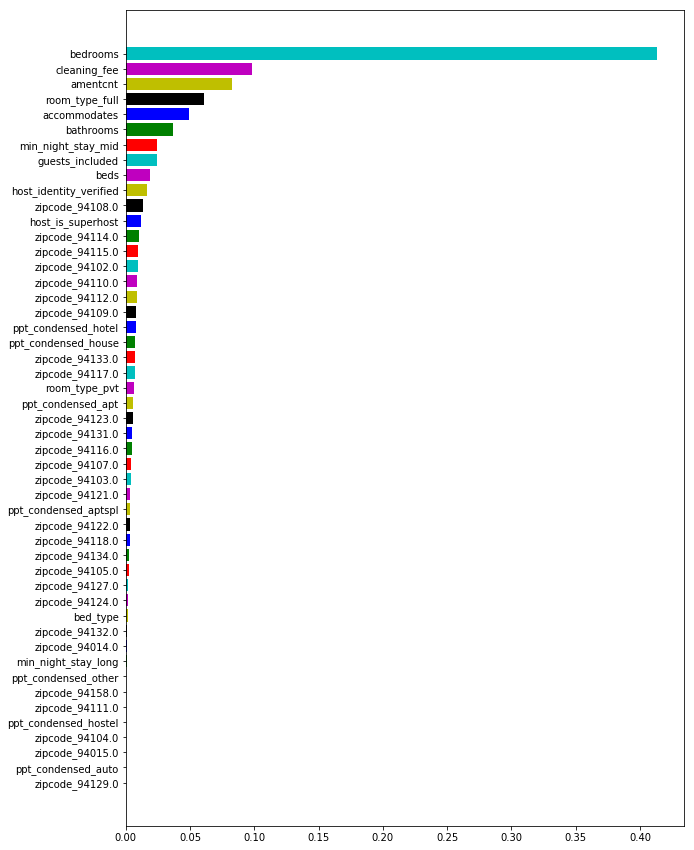

In [9]:
featurelist=X_train.columns
featureimp= regr.feature_importances_

tmp_df=featurelist.to_frame(index=False)
tmp_df=tmp_df.rename(columns={0:'feature'})
tmp_df['prime']=featureimp
feature_df=tmp_df.sort_values(by=['prime'], ascending=True)

fig=plt.figure(figsize=(10,15))
ax1=fig.add_subplot(111)
ax1.barh(feature_df['feature'],feature_df['prime'],color='rgbkymc')

In [10]:
print(regr.predict([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]))

[85.6]


In [11]:
y_pred=regr.predict(X_test)

rf_score=regr.score(X_test,y_test)
print("Random Forest Score",rf_score)

#Calculate the baseline errors
baseline = abs(y_test.mean()-y_test)
print("Baseline Absolute Error",np.mean(baseline))

#Calculate the absolute errors
residuals = abs(y_pred-y_test)
print("Mean Absolute Error",np.mean(residuals))

#Calculate Mean Absolute pct error
mape = (residuals/y_test)*100

#Accuracy 
accy=100-np.mean(mape)

#Mean Absolute Error 

print("Accuracy",round(accy,2), '%')

print("My R2 Score is : ",my_metric(y_test,y_pred))

Random Forest Score 0.6419964449771263
Baseline Absolute Error 77.42548779203487
Mean Absolute Error 42.08878301667925
Accuracy 70.79 %
My R2 Score is :  0.6419964449771263


In [12]:
y_pred

array([227.6       ,  75.4       , 265.7       ,  76.6       ,
        93.        , 261.        , 117.1       , 232.1       ,
       133.5       , 185.02535354, 120.3       ,  98.35      ,
        62.1       , 245.7       , 131.3       ,  84.6       ,
        97.7       , 327.4       , 310.1       , 105.5       ,
       187.7       , 162.35      , 231.4       , 150.9       ,
        99.1       , 212.84      , 185.02535354,  76.6       ,
       134.36666667, 124.        , 336.9       , 200.9       ,
       163.7       , 198.3       , 208.3       , 237.        ,
       342.81666667, 117.7       , 310.        , 151.3       ,
        85.8       , 230.4       , 155.2       , 113.3       ,
        82.5       , 181.9       , 384.5       , 121.5       ,
       173.5       ,  77.6       , 110.2       , 141.7       ,
       216.5       , 283.9       , 282.5       , 286.5       ,
       270.8       , 173.8       , 186.6       , 128.6       ,
       208.        , 136.4       , 248.83333333, 175.5 

In [13]:
#Building Residual DF

# dfpred= y_test.to_frame()
dfpred = pd.DataFrame()
dfpred['price'] = y_test
dfpred['rf_preds'] = y_pred
dfpred['rf_resid'] = dfpred.rf_preds-dfpred.price
dfpred['rf_residpct'] = (dfpred.rf_preds-dfpred.price)/dfpred.price*100
dfpred.head()

,price,rf_preds,rf_resid,rf_residpct
3038,200.0,227.6,27.6,13.800000
4291,49.0,75.4,26.4,53.877551
1872,195.0,265.7,70.7,36.256410
3107,32.0,76.6,44.6,139.375000
2817,59.0,93.0,34.0,57.627119


In [14]:
dfpred[dfpred.price > 1000]

,price,rf_preds,rf_resid,rf_residpct


In [15]:
%%time
dfpred[dfpred.price < 100]

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 876 µs


,price,rf_preds,rf_resid,rf_residpct
4291,49.0,75.400000,26.400000,53.877551
3107,32.0,76.600000,44.600000,139.375000
2817,59.0,93.000000,34.000000,57.627119
3301,85.0,120.300000,35.300000,41.529412
116,56.0,62.100000,6.100000,10.892857
2812,58.0,84.600000,26.600000,45.862069
2587,90.0,105.500000,15.500000,17.222222
2427,73.0,187.700000,114.700000,157.123288
1041,99.0,200.900000,101.900000,102.929293
3031,88.0,85.800000,-2.200000,-2.500000


CPU times: user 52 ms, sys: 16 ms, total: 68 ms
Wall time: 46.6 ms


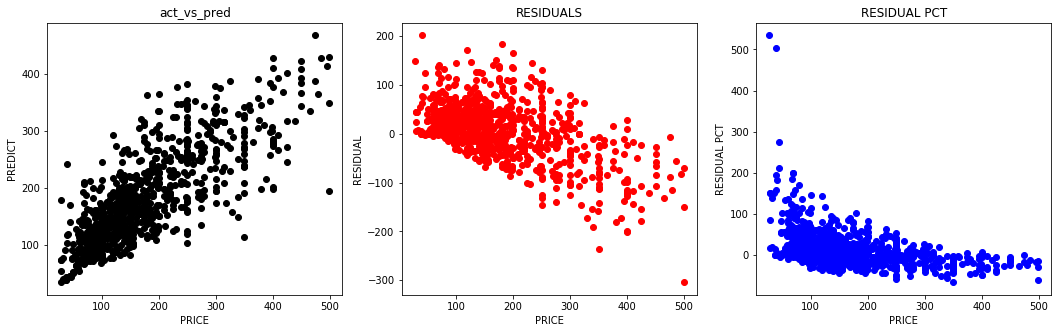

In [16]:
%%time
fig = plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

resids=y_pred-y_test

ax1.scatter(y_test, y_pred,  color='black')
ax1.set_title('act_vs_pred')
ax1.set_xlabel('PRICE')
ax1.set_ylabel('PREDICT')

ax2.scatter(y_test,resids, color='red')
ax2.set_title('RESIDUALS')
ax2.set_xlabel('PRICE')
ax2.set_ylabel('RESIDUAL')

ax3.scatter(y_test,resids/y_test*100, color='blue')
ax3.set_title('RESIDUAL PCT')
ax3.set_xlabel('PRICE')
ax3.set_ylabel('RESIDUAL PCT')

In [17]:
# X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
treelist=[1,5,10,15,25,50,100,150,200,250,300]
for trees in treelist:
# for trees in range(25,300,25):
    regr = RandomForestRegressor(n_estimators=trees,random_state=0)
    regr.fit(X_train, y_train)
    print(trees, regr.score(X_test,y_test))
# print(rf_score)

1 0.36251502316947526
5 0.6069084348001449
10 0.6419964449771263
15 0.6538637689273343
25 0.6661192761941022
50 0.6723172239302699
100 0.6732565849117348
150 0.6724063930373041
200 0.6718714565672512
250 0.6726619102088365
300 0.6739348238899352


### RANDOM FOREST TUNING

In [37]:
# Random Hyper Parameter Grid

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators = [200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [38]:
print(random_grid)

{'min_samples_split': [2, 5, 10], 'bootstrap': [True, False], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [200], 'max_features': ['auto', 'sqrt']}


print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [41]:
%%time
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=1, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   51.3s finished


CPU times: user 1.77 s, sys: 108 ms, total: 1.88 s
Wall time: 52.6 s


In [40]:
#Best Parameters based on the the above search
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 200}

In [23]:
rf_random.best_score_

0.6452788046867476

In [25]:
#EVALUATE THE RANDOM SEARCH BEST PARAMETERS

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    rfcv_score = model.score(test_features, test_labels)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('RF Score = {:0.2f}.'.format(rfcv_score))
    print('Average Error: {:0.4f}'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print("My R2 Score is : ",my_metric(test_labels,predictions))
    return accuracy

In [26]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
print("********************* BASE MODEL Performance *********************")
base_accuracy = evaluate(base_model, X_test, y_test)



best_random = rf_random.best_estimator_
print("********************* RANDOM MODEL Performance *********************")
random_accuracy = evaluate(best_random, X_test, y_test)

********************* BASE MODEL Performance *********************
Model Performance
RF Score = 0.62.
Average Error: 42.5778
Accuracy = 70.56%.
My R2 Score is :  0.6216113526005338
********************* RANDOM MODEL Performance *********************
Model Performance
RF Score = 0.69.
Average Error: 39.4287
Accuracy = 73.37%.
My R2 Score is :  0.6907907366745617


In [31]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 3.94%.


### GRID SEARCH WITH CROSS VALIDATION

In [33]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [20, 40, 60, 80,100],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 3, 5],
    'min_samples_split': [2, 3, 5, 10],
    'n_estimators': [200]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 1)

In [34]:
%%time
# # Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   26.9s finished


CPU times: user 1.54 s, sys: 112 ms, total: 1.66 s
Wall time: 27.8 s


In [35]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 40,
 'max_features': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 200}

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'n_estimators': 100}

In [36]:
best_grid = grid_search.best_estimator_
print("********************* GRID SEARCH MODEL Performance *********************")
grid_accuracy = evaluate(best_grid, X_test, y_test)

********************* GRID SEARCH MODEL Performance *********************
Model Performance
RF Score = 0.68.
Average Error: 40.4415
Accuracy = 72.13%.
My R2 Score is :  0.6822925378926843
